In [4]:
import mne
import os

def concat_dataset(subjects, num_blocks):
    raws = []
    # base_path = "E:\Thesis\HybridSpeller\\record"
    base_path = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record"

    for subject in subjects:
        for i in range(0,num_blocks):
            print(subject)
            path = os.path.join(base_path, subject, f"{subject}{i}.fif")
            print("Here is the path")
            print(path)
            raws.append(mne.io.read_raw_fif(path, preload = True))
    raw = mne.concatenate_raws(raws)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    print(raw.info['ch_names'])
    print(raw.info['sfreq'])
    return raw

sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif...
    Range : 0 ... 13807 =      0.000 ...    55.228 secs
Ready.
Reading 0 ... 13807  =      0.000 ...    55.228 secs...
sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303192.fif
Opening raw data file C

C:\Users\bci\AppData\Local\Temp\ipykernel_5720\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))
C:\Users\bci\AppData\Local\Temp\ipykernel_5720\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))
C:

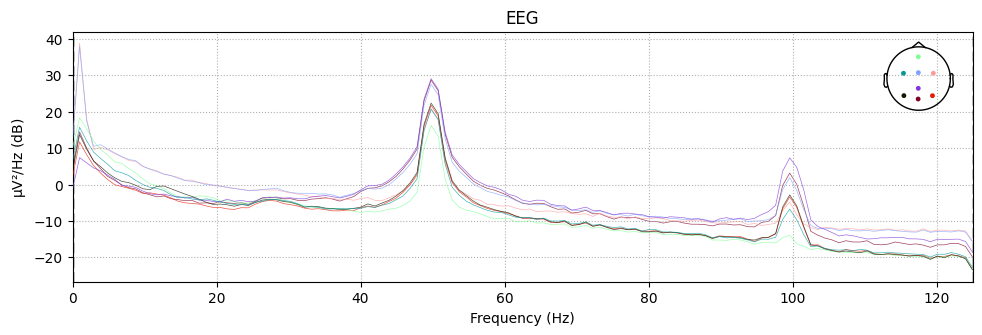

In [5]:
from scipy.signal import hilbert

subjects = ['sunsun_20230319']
raw = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
new_data = raw.get_data()[:,10*250:-10*250]
raw = mne.io.RawArray(new_data, raw.info)
raw.notch_filter([50,100])
events = mne.find_events(raw)
epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
raw.compute_psd().plot()

sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif...
    Range : 0 ... 13810 =      0.000 ...    55.240 secs
Ready.
Reading 0 ... 13810  =      0.000 ...    55.240 secs...
sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsu

C:\Users\bci\AppData\Local\Temp\ipykernel_5720\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))
C:\Users\bci\AppData\Local\Temp\ipykernel_5720\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path,

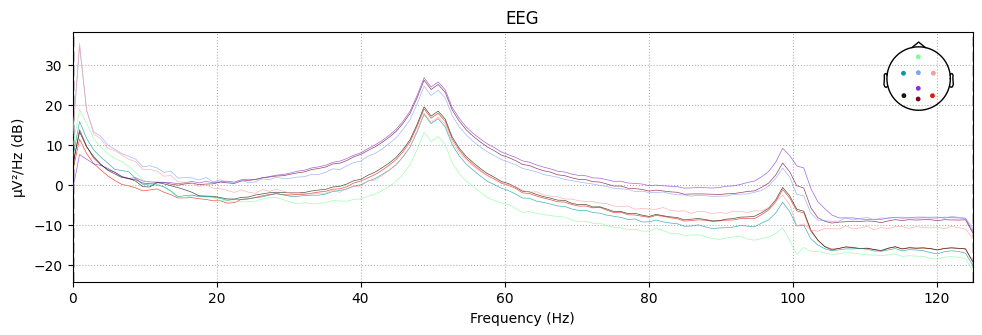

In [6]:
from scipy.signal import hilbert

subjects = ['sunsun_20230319_test']
raw_test = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
new_test_data = raw.get_data()[:,10*250:-10*250]
raw_test = mne.io.RawArray(new_test_data, raw.info)
raw_test.notch_filter([50,100])
events_test = mne.find_events(raw_test)
epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
raw_test.compute_psd().plot()

In [7]:
from numpy import ndarray
import numpy as np
from scipy.sparse import vstack, identity, spmatrix
from typing import Optional, cast, Union
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from joblib import Parallel, delayed
from functools import partial

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from typing import Optional, cast,  List
from joblib import Parallel, delayed
from functools import partial
from scipy.linalg import eigh, pinv, qr
from scipy.stats import pearsonr
from scipy.sparse import block_diag, identity, vstack, spmatrix
from scipy.sparse.linalg import eigsh

def _ged_wong( 
    Z: ndarray,
    D: Optional[ndarray] = None,
    P: Optional[ndarray] = None,
    n_components=1,
    method="type1",
):
    if method != "type1" and method != "type2":
        raise ValueError("not supported method type")

    A = Z
    if D is not None:
        A = D.T @ A
    if P is not None:
        A = P.T @ A
    A = A.T @ A
    if method == "type1":
        B = Z
        if D is not None:
            B = D.T @ Z
        B = B.T @ B
        if isinstance(A, spmatrix) or isinstance(B, spmatrix):
            D, W = eigsh(A, k=n_components, M=B)
        else:
            D, W = eigh(A, B)
    elif method == "type2":
        if isinstance(A, spmatrix):
            D, W = eigsh(A, k=n_components)
        else:
            D, W = eigh(A)

    D_exist = cast(ndarray, D)
    ind = np.argsort(D_exist)[::-1]
    D_exist, W = D_exist[ind], W[:, ind]
    return D_exist[:n_components], W[:, :n_components]


def _ecca_feature(
    X: ndarray,
    templates: ndarray,
    Yf: ndarray,
    Us: Optional[ndarray] = None,
    n_components: int = 1,
):
    if Us is None:
        Us_array, _ = zip(
            *[_scca_kernel(templates[i], Yf[i]) for i in range(len(templates))]
        )
        Us = np.stack(Us_array)
    rhos = []
    for Xk, Y, U3 in zip(templates, Yf, Us):
        rho_list = []
        # 14a, 14d
        U1, V1 = _scca_kernel(X, Y)
        a = U1[:, :n_components].T @ X
        b = V1[:, :n_components].T @ Y
        a, b = np.reshape(a, (-1)), np.reshape(b, (-1))
        rho_list.append(pearsonr(a, b)[0])
        a = U1[:, :n_components].T @ X
        b = U1[:, :n_components].T @ Xk
        a, b = np.reshape(a, (-1)), np.reshape(b, (-1))
        rho_list.append(pearsonr(a, b)[0])
        # 14b
        U2, _ = _scca_kernel(X, Xk)
        a = U2[:, :n_components].T @ X
        b = U2[:, :n_components].T @ Xk
        a, b = np.reshape(a, (-1)), np.reshape(b, (-1))
        rho_list.append(pearsonr(a, b)[0])
        # 14c
        a = U3[:, :n_components].T @ X
        b = U3[:, :n_components].T @ Xk
        a, b = np.reshape(a, (-1)), np.reshape(b, (-1))
        rho_list.append(pearsonr(a, b)[0])
        rho = np.array(rho_list)
        rho = np.sum(np.sign(rho) * (rho**2))
        rhos.append(rho)
    return rhos


def _scca_kernel(X: ndarray, Yf: ndarray):
    """Standard CCA (sCCA).

    This is an time-consuming implementation due to GED.

    X: (n_channels, n_samples)
    Yf: (n_harmonics, n_samples)
    """
    n_components = min(X.shape[0], Yf.shape[0])
    Q, R = qr(Yf.T, mode="economic")
    P = Q @ Q.T
    Z = X.T
    _, U = _ged_wong(Z, None, P, n_components=n_components)  # U for X
    V = pinv(R) @ Q.T @ X.T @ U  # V for Yf
    return U, V


class ECCA(BaseEstimator, TransformerMixin, ClassifierMixin):
    def __init__(self, n_components: int = 1, n_jobs: Optional[int] = None):
        self.n_components = n_components
        self.n_jobs = n_jobs

    def fit(self, X: ndarray, y: ndarray, Yf: ndarray):

        self.classes_ = np.unique(y)
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        self.templates_ = np.stack(
            [np.mean(X[y == label], axis=0) for label in self.classes_]
        )

        Yf = np.reshape(Yf, (-1, *Yf.shape[-2:]))
        Yf = Yf - np.mean(Yf, axis=-1, keepdims=True)
        self.Yf_ = Yf
        self.Us_, self.Vs_ = zip(
            *[
                _scca_kernel(self.templates_[i], self.Yf_[i])
                for i in range(len(self.classes_))
            ]
        )
        self.Us_, self.Vs_ = np.stack(self.Us_), np.stack(self.Vs_)
        return self

    def transform(self, X: ndarray):
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        templates = self.templates_
        Yf = self.Yf_
        Us = self.Us_
        n_components = self.n_components
        rhos = Parallel(n_jobs=self.n_jobs)(
            delayed(partial(_ecca_feature, Us=Us, n_components=n_components))(
                a, templates, Yf
            )
            for a in X
        )
        rhos = np.stack(rhos)
        return rhos

    def predict(self, X: ndarray):
        rhos = self.transform(X)
        labels = self.classes_[np.argmax(rhos, axis=-1)]
        return labels


def generate_cca_references(
    freqs,
    srate,
    T,
    phases: Optional[Union[ndarray, int, float]] = None,
    n_harmonics: int = 1,
):
    if isinstance(freqs, int) or isinstance(freqs, float):
        freqs = [freqs]
    freqs = np.array(freqs)[:, np.newaxis]
    if phases is None:
        phases = 0
    if isinstance(phases, int) or isinstance(phases, float):
        phases = np.array([phases])
    phases = np.array(phases)[:, np.newaxis]
    t = np.linspace(0, T, int(T * srate))

    Yf = []
    for i in range(n_harmonics):
        Yf.append(
            np.stack(
                [
                    np.sin(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                    np.cos(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                ],
                axis=1,
            )
        )
    Yf = np.concatenate(Yf, axis=1)
    return Yf

In [8]:
X_train = epochs.get_data()[:,:-1,:-1]
print(X_train.shape)
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
print(dropped_epochs)

Using data from preloaded Raw for 45 events and 926 original time points ...
1 bad epochs dropped
(44, 8, 925)
[44]


In [9]:
print(dropped_epochs)

[44]


In [10]:
import numpy as np

events = np.delete(events, dropped_epochs, axis=0)
events[:,-1].shape

(44,)

In [11]:
y_train = events[:,-1]

In [12]:
X_test = epochs_test.get_data()[:,:-1,:-1]
print(X_test.shape)
dropped_epochs_test = [n for n, dl in enumerate(epochs_test.drop_log) if len(dl)]  # result is a list
print(dropped_epochs_test)

Using data from preloaded Raw for 41 events and 926 original time points ...
1 bad epochs dropped
(40, 8, 925)
[40]


In [13]:
events_test = np.delete(events_test, dropped_epochs_test, axis=0)
y_test = events_test[:,-1]

In [17]:
from sklearn.utils import shuffle

FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]

Yf = generate_cca_references(freqs=FREQS, srate=250, T=3.7, phases=PHASES, n_harmonics=5)

estimator=ECCA(n_components = 1, n_jobs=-1)
model = estimator.fit(X_train, y_train, Yf)
X_test, y_test = shuffle(X_test, y_test)
preds = model.predict(X_test)
acc = np.mean(preds==y_test)
print(preds)
print(y_test)
print(acc)

[12  1  1 10 11  1 10  1  2 21 12 12  2 20  2 12 19 11 19  1  3 21  2 20
 12 10 21  3  3  2  2 21  1 11 11 10 10 20 19 19]
[21  1 11 10 11  1 10  1  2 21 12 12  2 20  2 12 19 11 19  1  3 21  2 20
 12 10 21  3  3  2 12 21  1 11 11 10 10 20 19 19]
0.925


In [18]:
import pickle

# save the model to disk
filename = 'ECCA_model.sav'
pickle.dump(model, open(filename, 'wb'))

Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif...
    Range : 0 ... 925 =      0.000 ...     3.700 secs
Ready.
Reading 0 ... 925  =      0.000 ...     3.700 secs...
Effective window size : 1.024 (s)


C:\Users\bci\AppData\Local\Temp\ipykernel_5720\3560539285.py:2: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload = True)
c:\Users\bci\.virtualenvs\hybrid-ssvep-p300-speller-ZL_XZSnA\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


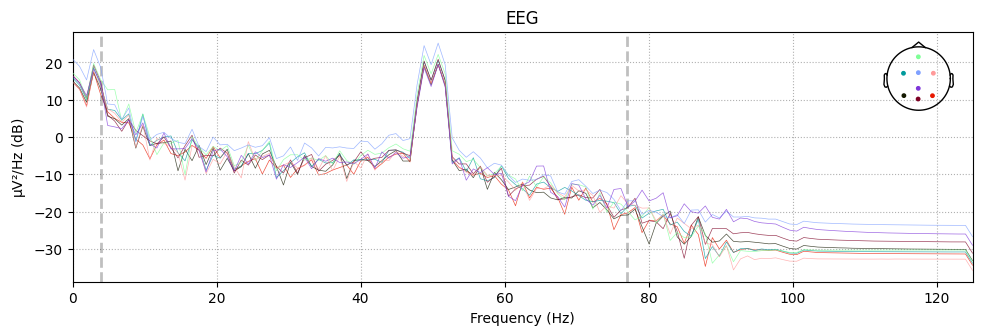

In [19]:
fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif"
raw = mne.io.read_raw_fif(fname, preload = True)
raw.compute_psd().plot()

In [20]:
data = raw.get_data()[:,:925]
data.shape

(8, 925)

In [22]:
MARKERS:dict = {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0, "F": 6.0, "G": 7.0, "H": 8.0, "I": 9.0, "J": 10.0, "K": 11.0, "L": 12.0, "M": 13.0, "N": 14.0, "O": 15.0, "P": 16.0, "Q": 17.0, "R": 18.0, "S": 19.0, "T": 20.0, "U": 21.0, "V": 22.0, "W": 23.0, "X": 24.0, "Y": 25.0, "Z": 26.0, "0": 27.0, "1": 28.0, "2": 29.0, "3": 30.0, "4": 31.0, "5": 32.0, "6": 33.0, "7": 34.0, "8": 35.0, "9": 36.0, ".": 37.0, "?": 38.0, ",": 39.0, "(": 40.0, "Space": 41.0, ")": 42.0, "!": 43.0, "-": 44.0, "<<":45.0, "trial_start":99.0}
result = model.predict(data)
print("Here is the result", result[0])
print(list(filter(lambda x: MARKERS[x] == result[0], MARKERS))[0])

Here is the result 12
L
